# 1. Geocoding no Geopandas

O Geocoding é o processo de transformar um endereço em coordenadas geográficas (formato numérico). Em contrapartida a geocodificação reversa transforma coordenadas em um endereço.

Utilizando o geopandas, podemos fazer operação de geocoding através da função ``geocode()``, que recebe uma lista de endereços (string) e retorna um GeoDataFrame contendo o resultado em objetos `Point` na coluna `geometry`.

Nós geocodificaremos os endereços armazenados em um arquivo de texto chamado `roubos.csv`, que é uma pequena amostra com apenas 5 tuplas contendo informações de eventos de roubos que aconteceram na cidade de Fortaleza.

vamos carregar os dados utilizando pandas com a função `read_csv()` e mostrá-los.

In [1]:
# Import necessary modules
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# Filepath
fp = r"data/roubos.csv"

# Read the data
data = pd.read_csv(fp, sep=',')
data

,natureza,localTipo,logradouro,complEnder,localNumero,municipioOficial,bairroOficial
0,ROUBO A PESSOA,ESTACIONAMENTO,R TABELIÃO FABIÃO,SAIDA DO NORTH SHOPPING,2450,Fortaleza,São Gerardo Alagadiço
1,ROUBO A PESSOA,VIA PUBLICA,AV BEZERRA DE MENEZES,NORTH SHOPPING,2450,Fortaleza,São Gerardo Alagadiço
2,ROUBO A PESSOA,VIA PUBLICA,R RUA FRANCISCO FERREIRA BAIMA,MESSEJANA,461,Fortaleza,Messejana
3,ROUBO A PESSOA,VIA PUBLICA,AV FREI CIRILO,PIZZARIA FILHO DA PROMESSA,4843,Fortaleza,Messejana
4,ROUBO (OUTROS),ESTACIONAMENTO,AV WASHINGTON SOARES,EXPRESS CAR WASH,1500,Fortaleza,Eng. Luciano Cavalcante


Perceba que apesar de possuírmos informação de endereço, não temos coordenadas dos eventos, o que dificulta qualquer tipo de análise. Para obtermos as coordenadas vamos fazer o geocoding dos endereços.

Mas antes, vamos unir todas as informações de endereço em uma coluna só chamada de `endereco`.

In [2]:
data['endereco'] = data['logradouro'] + ', ' + data['localNumero'].apply(str)
data.head()

,natureza,localTipo,logradouro,complEnder,localNumero,municipioOficial,bairroOficial,endereco
0,ROUBO A PESSOA,ESTACIONAMENTO,R TABELIÃO FABIÃO,SAIDA DO NORTH SHOPPING,2450,Fortaleza,São Gerardo Alagadiço,"R TABELIÃO FABIÃO, 2450"
1,ROUBO A PESSOA,VIA PUBLICA,AV BEZERRA DE MENEZES,NORTH SHOPPING,2450,Fortaleza,São Gerardo Alagadiço,"AV BEZERRA DE MENEZES, 2450"
2,ROUBO A PESSOA,VIA PUBLICA,R RUA FRANCISCO FERREIRA BAIMA,MESSEJANA,461,Fortaleza,Messejana,"R RUA FRANCISCO FERREIRA BAIMA, 461"
3,ROUBO A PESSOA,VIA PUBLICA,AV FREI CIRILO,PIZZARIA FILHO DA PROMESSA,4843,Fortaleza,Messejana,"AV FREI CIRILO, 4843"
4,ROUBO (OUTROS),ESTACIONAMENTO,AV WASHINGTON SOARES,EXPRESS CAR WASH,1500,Fortaleza,Eng. Luciano Cavalcante,"AV WASHINGTON SOARES, 1500"


Agora vamos transformar os endereços em coordenadas usando `geocode()` com a ferramente de busca de dados Nominatim que realiza consultas no OpenStreetMap.

Antes será necessário instalar a biblioteca geopy com o pip, para isso utilize o comando: pip install geopy

In [4]:
# Import the geocoding tool
from geopandas.tools import geocode

# Geocode addresses with Nominatim backend
geo = geocode(data['endereco'], provider = 'nominatim', user_agent ='carlos')

In [5]:
geo

,geometry,address
0,POINT (-38.56549 -3.73367),"Rua Tabelião Fabião, Presidente Kennedy, Forta..."
1,POINT (-38.54764 -3.73231),"Avenida Bezerra de Menezes, Parque Araxá, Fort..."
2,POINT (-38.48605 -3.83091),"Rua Francisco Ferreira Baima, Messejana, Forta..."
3,POINT (-38.49779 -3.81658),"Avenida Frei Cirilo, Messejana, Fortaleza, Mic..."
4,POINT (-38.48035 -3.79197),"Avenida Washington Soares, Parque Manibura, Fo..."


Como resultado, temos um GeoDataFrame que contém nosso endereço e uma coluna 'geometry' contendo objeto Point que podemos usar para exportar os endereços para um Shapefile por exemplo.

Como os indices das duas tabelas são iguais, podemos unir facilmente.

In [6]:
data['geometry'] = geo['geometry']
data.head()

,natureza,localTipo,logradouro,complEnder,localNumero,municipioOficial,bairroOficial,endereco,geometry
0,ROUBO A PESSOA,ESTACIONAMENTO,R TABELIÃO FABIÃO,SAIDA DO NORTH SHOPPING,2450,Fortaleza,São Gerardo Alagadiço,"R TABELIÃO FABIÃO, 2450",POINT (-38.56549 -3.73367)
1,ROUBO A PESSOA,VIA PUBLICA,AV BEZERRA DE MENEZES,NORTH SHOPPING,2450,Fortaleza,São Gerardo Alagadiço,"AV BEZERRA DE MENEZES, 2450",POINT (-38.54764 -3.73231)
2,ROUBO A PESSOA,VIA PUBLICA,R RUA FRANCISCO FERREIRA BAIMA,MESSEJANA,461,Fortaleza,Messejana,"R RUA FRANCISCO FERREIRA BAIMA, 461",POINT (-38.48605 -3.83091)
3,ROUBO A PESSOA,VIA PUBLICA,AV FREI CIRILO,PIZZARIA FILHO DA PROMESSA,4843,Fortaleza,Messejana,"AV FREI CIRILO, 4843",POINT (-38.49779 -3.81658)
4,ROUBO (OUTROS),ESTACIONAMENTO,AV WASHINGTON SOARES,EXPRESS CAR WASH,1500,Fortaleza,Eng. Luciano Cavalcante,"AV WASHINGTON SOARES, 1500",POINT (-38.48035 -3.79197)


### Notas sobre a ferramenta Nominatim

Nominatim funciona relativamente bem se você tiver endereços bem definidos e bem conhecidos, como os que usamos neste tutorial. No entanto, em alguns casos, talvez você não tenha endereços bem definidos e você pode ter, por exemplo, apenas o nome de um shopping ou uma lanchonete. Nesses casos, a Nominatim pode não fornecer resultados tão bons e, porém você pode utilizar outras APIs como o [Google Geocoding API (V3)](https://developers.google.com/maps/documentation/geocoding/).

# 2. Operações entre geometrias

Descobrir se um certo ponto está localizado dentro ou fora de uma área,
ou descobrir se uma linha cruza com outra linha ou polígono são
operações geoespaciais fundamentais que são frequentemente usadas, e selecionar
dados baseados na localização. Tais consultas espaciais são uma das primeiras etapas do fluxo de trabalho ao fazer análise espacial.

## 2.1 Como verificar se o ponto está dentro de um polígono?

Computacionalmente, detectar se um ponto está dentro de um polígono é mais comumente feito utilizando uma fórmula específica chamada [algoritmo Ray Casting](https://en.wikipedia.org/wiki/Point_in_polygon#Ray_casting_algorithm). Em vez disso, podemos tomar
vantagem dos [predicados binários de Shapely](http://toblerity.org/shapely/manual.html#binary-predicates)
que podem avaliar as relações topológicas com os objetos.

Existem basicamente duas maneiras de conduzir essa consulta com o Shapely:

1. usando uma função chamada
   [.within()](http://toblerity.org/shapely/manual.html#object.within)
   que verifica se um ponto está dentro de um polígono
2. usando uma função chamada
   [.contains ()](http://toblerity.org/shapely/manual.html#object.contains)
   que verifica se um polígono contém um ponto

Aviso: apesar de estarmos falando aqui sobre a operação de **Point** dentro de um Polygon, também é possível verificar se um LineString ou Polygon esta dentro de outro Polygon.

- Vamos primeiro criar um polígono usando uma lista de coordenadas-tuplas e um
   par de objetos pontuais

In [7]:
from shapely.geometry import Point, Polygon

# Create Point objects
p1 = Point(24.952242, 60.1696017)
p2 = Point(24.976567, 60.1612500)

# Create a Polygon
coords = [(24.950899, 60.169158), (24.953492, 60.169158), (24.953510, 60.170104), (24.950958, 60.169990)]
poly = Polygon(coords)

# Let's check what we have
print(p1)
print(p2)
print(poly)

POINT (24.952242 60.1696017)
POINT (24.976567 60.16125)
POLYGON ((24.950899 60.169158, 24.953492 60.169158, 24.95351 60.170104, 24.950958 60.16999, 24.950899 60.169158))


Vamos verificar se esses pontos estão dentro do polígono

In [8]:
# Check if p1 is within the polygon using the within function
print(p1.within(poly))

# Check if p2 is within the polygon
print(p2.within(poly))

True
False


Então podemos ver que o primeiro ponto parece estar dentro do polígono e o segundo não.

- Na verdade, o primeiro ponto é perto do centro do polígono, como nós
    podemos ver se compararmos a localização do ponto com o centróide do polígono:

In [9]:
# Our point
print(p1)

# The centroid
print(poly.centroid)

POINT (24.952242 60.1696017)
POINT (24.95224242849236 60.16960179038188)


## 2.2 Interseção

Outra operação geoespacial típica é ver se uma geometria
[intercepta](http://toblerity.org/shapely/manual.html#object.intersects) ou [toca](http://toblerity.org/shapely/manual.html#object.touches)
outra geometria. A diferença entre esses dois é que:

- Se os objetos se cruzam, o limite e o interior de um objeto precisa
    interceptar com os do outro objeto.

- Se um objeto tocar o outro, só é necessário ter (pelo menos) um ponto único de suas fronteiras em comum, mas seus interiores não se cruzam.

Vamos tentar isso.

- Vamos criar dois LineStrings

In [10]:
from shapely.geometry import LineString, MultiLineString

# Create two lines
line_a = LineString([(0, 0), (1, 1)])
line_b = LineString([(1, 1), (0, 2)])

- Vamos ver se eles se interceptam

In [11]:
line_a.intersects(line_b)

True

- Eles também tocam um ao outro?

In [12]:
line_a.touches(line_b)

True

Sim, as duas operações são verdade e podemos ver isso plotando os dois objetos juntos.

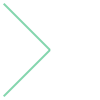

In [13]:
# Create a MultiLineString from line_a and line_b
multi_line = MultiLineString([line_a, line_b])
multi_line

## 2.3 Ponto dentro de polygon usando o geopandas

Uma das estratégias adotadas pela Secretaria da Segurança Pública e Defesa Social (SSPDS) para o aperfeiçoamento de trabalhos policiais, periciais e bombeirísticos em território cearense é a delimitação do Estado em Áreas Integradas de Segurança (AIS).

A cidade de fortaleza por si só é dividida em cerca de 10 áreas integradas de segurança (AIS). Vamos carregar estas divisões administrativas e visualizar elas.

In [18]:
ais_filep = 'data/ais.shp'

ais_gdf = gpd.read_file(ais_filep)

In [19]:
ais_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [20]:
ais_gdf.head()

,NM_MUNICIP,CD_GEOCODM,AIS,BAIRROS,CD_BAIRRO,NM_AIS,geometry
0,FORTALEZA,2304400,6,Presidente Kennedy,62,AIS6,"POLYGON Z ((-38.61706 -3.72012 0.00000, -38.61..."
1,FORTALEZA,2304400,8,Jardim Iracema,63,AIS8,"POLYGON Z ((-38.57230 -3.71230 0.00000, -38.57..."
2,FORTALEZA,2304400,4,Farias Brito,66,AIS4,"POLYGON Z ((-38.56490 -3.72896 0.00000, -38.56..."
3,FORTALEZA,2304400,5,José Bonifácio,77,AIS5,"POLYGON Z ((-38.52396 -3.73689 0.00000, -38.52..."
4,FORTALEZA,2304400,10,Joaquim Távora,80,AIS10,"POLYGON Z ((-38.45477 -3.73216 0.00000, -38.45..."


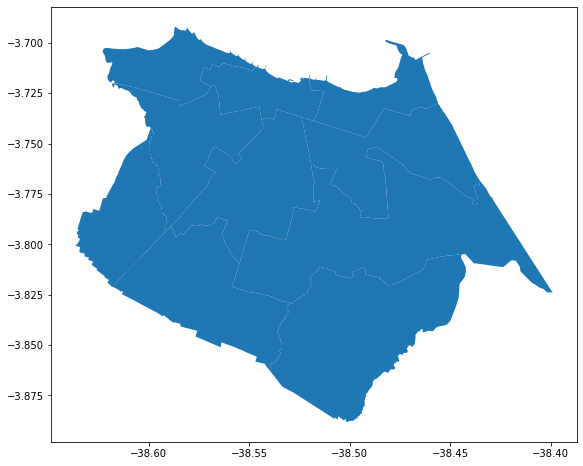

In [21]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize=(15,8))

ais_gdf.plot(ax=ax)
plt.show()

Agora vamos mostrar somente as fronteiras das AIS e os nosso eventos de crimes.

Mas antes bora transformar os nosso dados de roubo em um GeoDataFrame.

In [22]:
data_gdf = gpd.GeoDataFrame(data)
data_gdf.crs = ais_gdf.crs
data_gdf.head()

,natureza,localTipo,logradouro,complEnder,localNumero,municipioOficial,bairroOficial,endereco,geometry
0,ROUBO A PESSOA,ESTACIONAMENTO,R TABELIÃO FABIÃO,SAIDA DO NORTH SHOPPING,2450,Fortaleza,São Gerardo Alagadiço,"R TABELIÃO FABIÃO, 2450",POINT (-38.56549 -3.73367)
1,ROUBO A PESSOA,VIA PUBLICA,AV BEZERRA DE MENEZES,NORTH SHOPPING,2450,Fortaleza,São Gerardo Alagadiço,"AV BEZERRA DE MENEZES, 2450",POINT (-38.54764 -3.73231)
2,ROUBO A PESSOA,VIA PUBLICA,R RUA FRANCISCO FERREIRA BAIMA,MESSEJANA,461,Fortaleza,Messejana,"R RUA FRANCISCO FERREIRA BAIMA, 461",POINT (-38.48605 -3.83091)
3,ROUBO A PESSOA,VIA PUBLICA,AV FREI CIRILO,PIZZARIA FILHO DA PROMESSA,4843,Fortaleza,Messejana,"AV FREI CIRILO, 4843",POINT (-38.49779 -3.81658)
4,ROUBO (OUTROS),ESTACIONAMENTO,AV WASHINGTON SOARES,EXPRESS CAR WASH,1500,Fortaleza,Eng. Luciano Cavalcante,"AV WASHINGTON SOARES, 1500",POINT (-38.48035 -3.79197)


Agora sim, vamos mostrar as fronteiras de cada AIS juntamente com os eventos de roubo.

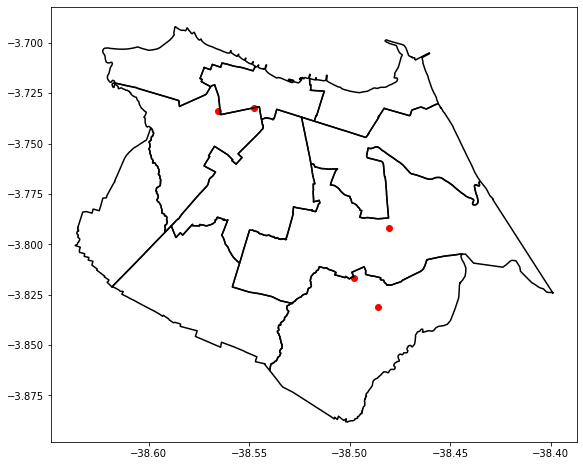

In [23]:
fig, ax = plt.subplots(1,1, figsize=(15,8))

for idx, ais in ais_gdf.iterrows():
    ax.plot(*ais['geometry'].exterior.xy, color='black')

data_gdf.plot(ax=ax, color='red')
plt.show()

Relembrando o endereço dos nosso dados, dois roubos aconteceram na avenida bezerra de menezes próximos ao north shopping. Sabendo que a AIS que contém o shopping é a de número 6, vamos selecionar somente os eventos de roubo dentro da AIS 6.

Primeiro vamos separar somente a geometria da AIS 6. Antes vamos visualizar os dados e verificar qual coluna pode nos ajudar nessa tarefa.

In [24]:
ais_gdf

,NM_MUNICIP,CD_GEOCODM,AIS,BAIRROS,CD_BAIRRO,NM_AIS,geometry
0,FORTALEZA,2304400,6,Presidente Kennedy,62,AIS6,"POLYGON Z ((-38.61706 -3.72012 0.00000, -38.61..."
1,FORTALEZA,2304400,8,Jardim Iracema,63,AIS8,"POLYGON Z ((-38.57230 -3.71230 0.00000, -38.57..."
2,FORTALEZA,2304400,4,Farias Brito,66,AIS4,"POLYGON Z ((-38.56490 -3.72896 0.00000, -38.56..."
3,FORTALEZA,2304400,5,José Bonifácio,77,AIS5,"POLYGON Z ((-38.52396 -3.73689 0.00000, -38.52..."
4,FORTALEZA,2304400,10,Joaquim Távora,80,AIS10,"POLYGON Z ((-38.45477 -3.73216 0.00000, -38.45..."
5,FORTALEZA,2304400,1,Praia de Iracema,88,AIS1,"POLYGON Z ((-38.46888 -3.70729 0.00000, -38.46..."
6,FORTALEZA,2304400,7,Lagoa Sapiranga (Coité),112,AIS7,"POLYGON Z ((-38.39901 -3.82406 0.00000, -38.39..."
7,FORTALEZA,2304400,3,Jangurussu,114,AIS3,"POLYGON Z ((-38.44520 -3.81927 0.00000, -38.44..."
8,FORTALEZA,2304400,9,Parque Santa Rosa (Apolo XI),117,AIS9,"POLYGON Z ((-38.56278 -3.78786 0.00000, -38.56..."
9,FORTALEZA,2304400,2,Genibaú,127,AIS2,"POLYGON Z ((-38.59787 -3.75952 0.00000, -38.59..."


Existem duas colunas que podem nos ajudar a filtrar a AIS desejada, a coluna `AIS` e a coluna `NM_AIS`. Vamos utilizar a primeira por ser necessário utilizar apenas o número.

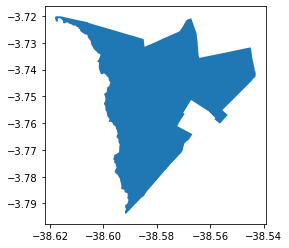

In [34]:
ais6 = ais_gdf[ais_gdf['AIS'] == 6]
ais6.plot()
plt.show()

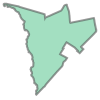

In [39]:
ais6_geometry = ais6.iloc[0].geometry
ais6_geometry

In [26]:
type(ais6)

geopandas.geodataframe.GeoDataFrame

Agora podemos utilizar a função `within()` para selecionar apenas os eventos que aconteceram dentro da AIS 6.

In [27]:
mask = data_gdf.within(ais6.geometry[0])
mask

0     True
1     True
2    False
3    False
4    False
dtype: bool

In [28]:
data_gdf_ais6 = data_gdf[mask]
data_gdf_ais6

,natureza,localTipo,logradouro,complEnder,localNumero,municipioOficial,bairroOficial,endereco,geometry
0,ROUBO A PESSOA,ESTACIONAMENTO,R TABELIÃO FABIÃO,SAIDA DO NORTH SHOPPING,2450,Fortaleza,São Gerardo Alagadiço,"R TABELIÃO FABIÃO, 2450",POINT (-38.56549 -3.73367)
1,ROUBO A PESSOA,VIA PUBLICA,AV BEZERRA DE MENEZES,NORTH SHOPPING,2450,Fortaleza,São Gerardo Alagadiço,"AV BEZERRA DE MENEZES, 2450",POINT (-38.54764 -3.73231)


Vamos ver os nosso dados em um mapa utilizando a o módulo Folium: __conda install -c conda-forge folium__ 

In [51]:
import folium

map_fortal = folium.Map(location=[data_gdf_ais6.loc[0, 'geometry'].y, 
                                  data_gdf_ais6.loc[0, 'geometry'].x], 
                                  zoom_start = 14)

folium.Marker([data_gdf_ais6.loc[0, 'geometry'].y, 
               data_gdf_ais6.loc[0, 'geometry'].x]).add_to(map_fortal)
folium.Marker([data_gdf_ais6.loc[1, 'geometry'].y,
               data_gdf_ais6.loc[1, 'geometry'].x]).add_to(map_fortal)

border_layer = folium.features.GeoJson(ais6_geometry, 
                    style_function=lambda feature: {
                        'color': 'red',
                        'weight' : 2,
                        'fillOpacity' : 0.2,
                        'opacity': 1,
                    }).add_to(map_fortal)

map_fortal